# Exploratory Data Analysis on Pain Dataset

## 0) import libraries

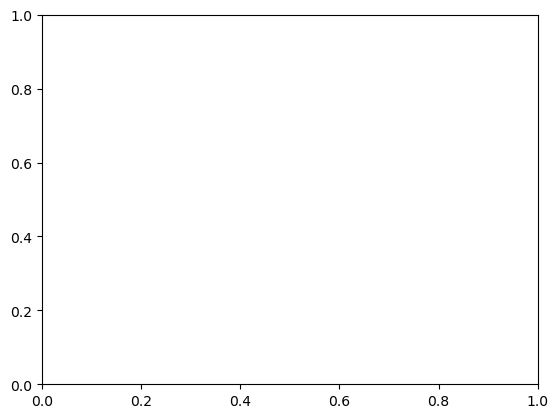

In [1]:
import sys
import scipy, scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statannot
from os.path import abspath
sys.path.insert(0, abspath('../Classification'))
sys.path.insert(0, abspath('..'))
sys.path.insert(0, abspath('../Multilevel'))
from utils_MEM import *
from helpers import *
from paths import TRIALS_PATH, RESULTS_DIR_EDA

## 1) import data 
set unique index to 
- ID
- AREA (1: most painful, 2: control, 3: ad)
- B (number of experiment either 1 or 2) 
- iTrials (unique vaue for each trial in each experiment B)

In [2]:
def import_trials_data(TRIALS_PATH):
    trials=read_dataset(TRIALS_PATH)
    # Preview the first 5 lines of the loaded data 
    trials.set_index(trials["id"], inplace=True)
    print(trials.shape)
    columns_to_drop=['id', 'B', 'iTrial']
    trials.drop(columns_to_drop, axis=1, inplace=True)
    trials.rename(columns={"Area": "AreaP"}, inplace=True)
    trials.head()
    return trials

def import_subj_data():
    area="mp"
    column_patterns_to_remove = ['_AllQuestions', 'rand_', 'PeaksP_', 'PeaksN_', 'height',
                                 '_PreExperiment', '_PostExperiment', '_Before',
                                 ]  # , 'cohort_'
    other_columns_to_remove = ['room_temp_v1', 'room_temp_v2', 'woman_cycle_v1', 'woman_cycle_v2',
                               'time_v1', 'time_v2']

    data_subj=create_subj_dataset(area=area, columns_to_remove=column_patterns_to_remove+other_columns_to_remove, fill_na=False, cohort_path="datasets\\")
    data_subj=undummy(data_subj, 'cohort')
    return data_subj
trials=import_trials_data(TRIALS_PATH)
data_subj=import_subj_data()
CRPP_to_del=["CRPP_026", "CRPP_079", "CRPP_115", "CRPP_116", "CRPP_134"]
data_subj.drop(CRPP_to_del, axis=0, inplace=True)

(22428, 59)


In [3]:
data_subj_basic=data_subj[["cohort", "age", "Gender", "BMI", "NRS_avg4wk"]]
data_subj_basic=data_subj_basic[data_subj_basic["cohort"].isin(["HC", "CRPS", "LBP", "SCI_NP"])]

In [4]:
data_subj_basic

,cohort,age,Gender,BMI,NRS_avg4wk
id,,,,,
CRPP_001,CRPS,56.0,1.0,25.826446,4.0
CRPP_002,CRPS,50.0,2.0,NaN,5.0
CRPP_003,LBP,48.0,2.0,22.321429,5.0
CRPP_004,LBP,67.0,2.0,23.306680,3.0
CRPP_005,LBP,24.0,1.0,26.861207,0.0
...,...,...,...,...,...
CRPP_129,LBP,63.0,2.0,NaN,3.0
CRPP_130,LBP,59.0,2.0,25.153150,2.0
CRPP_131,LBP,62.0,2.0,NaN,5.0


In [5]:
demo=pd.DataFrame(columns=["HC", "CRPS", "LBP", "SCI_NP", "chronic", "all"], index=["num", "f", "m", "<35", "35-50", ">50"])

In [6]:
# create four different dataframes, one for different element in cohort

data_subj_basic_HC = data_subj_basic[data_subj_basic['cohort'] == "HC"]
data_subj_basic_CRPS= data_subj_basic[data_subj_basic['cohort'] == "CRPS"]
data_subj_basic_LBP = data_subj_basic[data_subj_basic['cohort'] == "LBP"]
data_subj_basic_SCI_NP = data_subj_basic[data_subj_basic['cohort'] == "SCI_NP"]

for col in data_subj_basic_HC.select_dtypes(include=[np.number]).columns:   
    print("HC", col, data_subj_basic_HC[col].mean(), data_subj_basic_HC[col].std())
    
for col in data_subj_basic_CRPS.select_dtypes(include=[np.number]).columns:
    print("CRPS", col, data_subj_basic_CRPS[col].mean(), data_subj_basic_CRPS[col].std())
    
for col in data_subj_basic_LBP.select_dtypes(include=[np.number]).columns:
    print("LBP", col, data_subj_basic_LBP[col].mean(), data_subj_basic_LBP[col].std())
    
for col in data_subj_basic_SCI_NP.select_dtypes(include=[np.number]).columns:
    print("SCI_NP", col, data_subj_basic_SCI_NP[col].mean(), data_subj_basic_SCI_NP[col].std())
    

HC age 43.37837837837838 16.3492292569802
HC Gender 1.5945945945945945 0.4977426521283341
HC BMI 23.92302884861111 3.3578419197404252
HC NRS_avg4wk 0.0 0.0
CRPS age 45.05 13.00394676930613
CRPS Gender 1.85 0.36634754853252327
CRPS BMI 25.19564151 4.872424384173803
CRPS NRS_avg4wk 5.4 2.500526260399472
LBP age 51.8 16.93565252745262
LBP Gender 1.6 0.49487165930539356
LBP BMI 24.007983676428573 3.616935850380824
LBP NRS_avg4wk 3.88 1.7801627992508815
SCI_NP age 58.04375 8.021884130302556
SCI_NP Gender 1.125 0.3415650255319866
SCI_NP BMI 24.248467470000005 3.5034780840510185
SCI_NP NRS_avg4wk 4.733333333333333 1.6242214252050853


In [7]:
# for each column in the dataframe, compute the relative count of the values

data_subj_basic_HC = data_subj_basic_HC.apply(lambda x: x.value_counts(normalize=True))
data_subj_basic_CRPS = data_subj_basic_CRPS.apply(lambda x: x.value_counts(normalize=True))
data_subj_basic_LBP = data_subj_basic_LBP.apply(lambda x: x.value_counts(normalize=True))
data_subj_basic_SCI_NP = data_subj_basic_SCI_NP.apply(lambda x: x.value_counts(normalize=True))

# Counts

In [8]:
cohorts=["CRPS", 'LBP', 'SCI_NP', 'HC']

for cohort in cohorts:
    print(" {} subjects for {} cohort".format(len(data_subj_basic[data_subj_basic['cohort']==cohort]), cohort)) 

 20 subjects for CRPS cohort
 50 subjects for LBP cohort
 16 subjects for SCI_NP cohort
 37 subjects for HC cohort


## Gender

In [9]:
print("male")
data_subj_basic[data_subj_basic.Gender==1].groupby("cohort").describe()

male


age                                                       Gender  \
       count       mean        std   min    25%   50%    75%   max  count   
cohort                                                                      
CRPS     3.0  43.666667  12.503333  31.0  37.50  44.0  50.00  56.0    3.0   
HC      15.0  48.866667  18.395911  22.0  33.50  51.0  62.50  75.0   15.0   
LBP     20.0  54.400000  19.296577  22.0  41.25  63.0  69.50  78.0   20.0   
SCI_NP  14.0  58.121429   8.611636  39.0  53.75  60.0  63.75  70.7   14.0   

             ...        BMI            NRS_avg4wk                           \
       mean  ...        75%        max      count      mean       std  min   
cohort       ...                                                             
CRPS    1.0  ...  25.503616  25.826446        3.0  6.333333  2.081666  4.0   
HC      1.0  ...  27.445665  31.855956       15.0  0.000000  0.000000  0.0   
LBP     1.0  ...  26.941675  33.897211       20.0  3.800000  1.935812  0.0   
SCI_NP  1.0  ...  26.135879  33.139755       13.0  4.692308  1.750458  3.0   

                             
        25%  50%   75%  max  
cohort                       
CRPS    5.5  7.0  7.50  8.0  
HC      0.0  0.0  0.00  0.0  
LBP     2.0  4.0  5.25  6.0  
SCI_NP  3.0  4.0  6.00  8.0  

[4 rows x 32 columns]

In [10]:
print("female")
data_subj_basic[data_subj_basic.Gender==2].groupby("cohort").describe()

female


age                                                       Gender  \
       count       mean        std   min    25%   50%    75%   max  count   
cohort                                                                      
CRPS    17.0  45.294118  13.447884  22.0  33.00  49.0  57.00  65.0   17.0   
HC      22.0  39.636364  14.015452  21.0  28.25  37.0  51.50  69.0   22.0   
LBP     30.0  50.066667  15.260798  20.0  38.00  52.0  58.50  79.0   30.0   
SCI_NP   2.0  57.500000   0.707107  57.0  57.25  57.5  57.75  58.0    2.0   

             ...        BMI            NRS_avg4wk                           \
       mean  ...        75%        max      count      mean       std  min   
cohort       ...                                                             
CRPS    2.0  ...  28.949908  36.493764       17.0  5.235294  2.586731  1.0   
HC      2.0  ...  24.753624  29.760863       22.0  0.000000  0.000000  0.0   
LBP     2.0  ...  24.943024  32.235668       30.0  3.933333  1.700575  1.0   
SCI_NP  2.0  ...  22.432849  23.051755        2.0  5.000000  0.000000  5.0   

                             
        25%  50%  75%   max  
cohort                       
CRPS    3.0  6.0  6.0  10.0  
HC      0.0  0.0  0.0   0.0  
LBP     3.0  4.0  5.0   8.0  
SCI_NP  5.0  5.0  5.0   5.0  

[4 rows x 32 columns]

## Age

In [11]:
print("<35")
data_subj_basic[data_subj_basic.age<35].groupby("cohort").describe()

<35


age                                                      Gender  \
       count       mean       std   min    25%   50%    75%   max  count   
cohort                                                                     
CRPS     6.0  29.500000  3.885872  22.0  29.50  31.0  31.00  33.0    6.0   
HC      15.0  27.333333  4.418576  21.0  23.50  28.0  30.00  34.0   15.0   
LBP     10.0  26.400000  4.452215  20.0  23.25  25.5  29.75  34.0   10.0   
SCI_NP   0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN    0.0   

                  ...        BMI            NRS_avg4wk                      \
            mean  ...        75%        max      count mean       std  min   
cohort            ...                                                        
CRPS    1.833333  ...  24.670713  26.543210        6.0  5.5  1.643168  3.0   
HC      1.733333  ...  23.054326  25.306932       15.0  0.0  0.000000  0.0   
LBP     1.500000  ...  26.393353  32.235668       10.0  4.2  1.932184  0.0   
SCI_NP       NaN  ...        NaN        NaN        0.0  NaN       NaN  NaN   

                              
         25%  50%   75%  max  
cohort                        
CRPS    4.50  6.0  6.75  7.0  
HC      0.00  0.0  0.00  0.0  
LBP     3.25  4.0  6.00  6.0  
SCI_NP   NaN  NaN   NaN  NaN  

[4 rows x 32 columns]

In [12]:
print(">50")
data_subj_basic[(data_subj_basic.age>=35)&(data_subj_basic.age<50)].groupby("cohort").describe()

>50


age                                                    Gender  \
       count       mean       std   min   25%   50%   75%   max  count   
cohort                                                                   
CRPS     5.0  42.000000  6.204837  35.0  36.0  44.0  46.0  49.0    5.0   
HC       7.0  40.714286  2.811541  36.0  40.0  40.0  42.0  45.0    7.0   
LBP     11.0  43.363636  5.334280  35.0  39.0  45.0  47.5  49.0   11.0   
SCI_NP   2.0  42.000000  4.242641  39.0  40.5  42.0  43.5  45.0    2.0   

                  ...        BMI            NRS_avg4wk                      \
            mean  ...        75%        max      count mean       std  min   
cohort            ...                                                        
CRPS    1.800000  ...  28.685145  36.493764        5.0  6.6  2.607681  3.0   
HC      1.571429  ...  27.861157  29.760863        7.0  0.0  0.000000  0.0   
LBP     1.818182  ...  23.140706  26.122449       11.0  4.0  1.673320  2.0   
SCI_NP  1.000000  ...  22.386990  22.944089        2.0  4.5  2.121320  3.0   

                               
         25%  50%   75%   max  
cohort                         
CRPS    6.00  6.0  8.00  10.0  
HC      0.00  0.0  0.00   0.0  
LBP     3.00  4.0  4.50   8.0  
SCI_NP  3.75  4.5  5.25   6.0  

[4 rows x 32 columns]

## Location

In [13]:
## compute locationsù
def compute_location_cohorts(data_subj):
    location_col=[col for col in data_subj.columns if "Location" in col]
    data_location=(data_subj.groupby("cohort"))[location_col].sum()
    data_location["arm"]=data_location["Location_elbow_mp"]+data_location["Location_forearm_mp"]+data_location["Location_hand_mp"]+data_location["Location_wrist_mp"]
    data_location["leg"]=data_location["Location_foot_mp"]+data_location["Location_leg_mp"]+data_location["Location_poplit_mp"]+data_location["Location_thigh_mp"]
    data_location["back"]=data_location["Location_abdomen_mp"]+data_location["Location_back_mp"]+data_location["Location_buttocks_mp"]+data_location["Location_shoulder_mp"]
    return data_location
data_location=compute_location_cohorts(data_subj)
print(data_location)

        Location_abdomen_mp  Location_back_mp  Location_buttocks_mp  \
cohort                                                                
CRPS                    0.0               0.0                   0.0   
HC                      0.0              13.0                   0.0   
LBP                     0.0              37.0                   4.0   
SCI_NP                  1.0               2.0                   0.0   

        Location_elbow_mp  Location_foot_mp  Location_forearm_mp  \
cohort                                                             
CRPS                  1.0               6.0                  1.0   
HC                    1.0               8.0                  0.0   
LBP                   0.0               0.0                  0.0   
SCI_NP                0.0               8.0                  0.0   

        Location_hand_mp  Location_handc6_mp  Location_l5_mp  Location_leg_mp  \
cohort                                                                          
CR

## BMI

In [14]:
def compute_BMI_cohorts(data_subj):
    data_BMI=pd.DataFrame()
    data_BMI["mean"]=(data_subj.groupby("cohort"))["BMI"].mean()
    data_BMI["std"]=(data_subj.groupby("cohort"))["BMI"].std()
    return data_BMI
data_BMI=compute_BMI_cohorts(data_subj)
print(data_BMI["mean"])
print(data_BMI["std"])
print(data_subj["BMI"].describe())


cohort
CRPS      25.195642
HC        23.923029
LBP       24.007984
SCI_NP    24.248467
Name: mean, dtype: float64
cohort
CRPS      4.872424
HC        3.357842
LBP       3.616936
SCI_NP    3.503478
Name: std, dtype: float64
count    113.000000
mean      24.214664
std        3.738796
min       18.144869
25%       21.484375
50%       23.456790
75%       26.234568
max       36.493764
Name: BMI, dtype: float64


## Average Chronic Pain

In [15]:
def compute_avgNRS_cohorts(data_subj):
    data_NRS_avg4wk=(data_subj.groupby("cohort")).agg({'NRS_avg4wk':['mean','std']})
    data_NRS_avg4wk.loc["all", ("NRS_avg4wk","mean")]=(data_subj[data_subj["cohort"].isin(["CRPS", "LBP", "SCI_NP"])].NRS_avg4wk).mean()
    data_NRS_avg4wk.loc["all", ("NRS_avg4wk","std")]=(data_subj[data_subj["cohort"].isin(["CRPS", "LBP", "SCI_NP"])].NRS_avg4wk).std()
    return data_NRS_avg4wk
data_NRS_avg4wk=compute_avgNRS_cohorts(data_subj)
data_NRS_avg4wk

NRS_avg4wk          
             mean       std
cohort                     
CRPS     5.400000  2.500526
HC       0.000000  0.000000
LBP      3.880000  1.780163
SCI_NP   4.733333  1.624221
all      4.388235  2.030096

## NRS acute pain

In [16]:
df_final=trials.join(data_subj).reset_index()

In [17]:
def compute_avgNRSacute_cohorts(data_subj):
    data_NRS_avg4wk=(data_subj.groupby("cohort")).agg({'NRS':['mean','std']})
    data_NRS_avg4wk.loc["all_ch", ("NRS","mean")]=(data_subj[data_subj["cohort"].isin(["CRPS", "LBP", "SCI_NP"])].NRS).mean()
    data_NRS_avg4wk.loc["all_ch", ("NRS","std")]=(data_subj[data_subj["cohort"].isin(["CRPS", "LBP", "SCI_NP"])].NRS).std()
    return data_NRS_avg4wk
data_NRS_avgacute=compute_avgNRSacute_cohorts(df_final)
data_NRS_avgacute

NRS          
            mean       std
cohort                    
CRPS    3.613321  2.604277
HC      3.247229  2.292352
LBP     3.358367  2.816650
SCI_NP  2.933628  2.514742
all_ch  3.376928  2.722378

In [18]:
trials_mp=trials[trials.AreaP==1]

In [19]:
trials_id=(trials.groupby(["id", "AreaP"])).first()

In [20]:
list_location = [x for x in trials.columns if x.startswith('Location_')]
for i in list_location:
    print(i)
    print(trials_id[i].sum())

## 2) Dataset Description

In [21]:
trials.describe()

,AreaP,SCH_var,SCH_iqr,SCH_mad,SCH_rms,SCH_absmean,SCF_var,SCF_iqr,SCF_mad,SCF_rms,...,EEG_alpha,EEG_beta,EEG_theta,EEG_gamma,EEG_peak_frequency,EEG_peak_alpha_frequency,EEG_peak_beta_frequency,EEG_SampEn_01,EEGSampEn_01_m4,pain
count,22428.000000,2.242800e+04,22428.000000,22428.000000,22428.000000,22428.000000,2.242800e+04,22428.000000,22428.000000,22428.000000,...,22428.000000,22428.000000,22428.000000,22428.000000,22428.000000,22428.000000,22428.000000,22428.000000,22428.000000,22428.000000
mean,1.744248,4.975942e-07,0.000634,0.000303,0.000635,0.000482,2.230458e-07,0.000408,0.000205,0.000483,...,14.132791,12.860625,15.957549,0.442654,5.987337,9.596977,16.954967,0.206392,0.178451,0.500000
std,0.718725,1.883045e-06,0.001223,0.000558,0.000994,0.000813,1.139680e-06,0.000787,0.000371,0.000699,...,22.545363,23.599508,21.438108,2.830615,2.654663,1.716185,3.109171,0.066075,0.032353,0.500011
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.159364,0.484501,0.055701,0.011869,4.000000,8.000000,14.000000,0.032779,0.034011,0.000000
25%,1.000000,4.268237e-10,0.000031,0.000017,0.000113,0.000078,3.387343e-10,0.000027,0.000016,0.000125,...,4.800395,5.150840,4.906965,0.097284,4.000000,8.000000,14.000000,0.159111,0.159810,0.000000
50%,2.000000,8.042941e-09,0.000148,0.000078,0.000248,0.000183,7.677018e-09,0.000140,0.000075,0.000246,...,8.648546,8.434002,9.346807,0.158858,4.000000,9.000000,16.000000,0.201617,0.182879,0.500000
75%,2.000000,1.301792e-07,0.000636,0.000315,0.000673,0.000454,7.292849e-08,0.000460,0.000235,0.000513,...,15.856472,14.181628,18.603555,0.284575,8.000000,11.000000,19.000000,0.248358,0.201467,1.000000
max,3.000000,3.439226e-05,0.012679,0.005527,0.009430,0.009144,3.849664e-05,0.013783,0.005939,0.008567,...,1374.879255,803.398054,528.979656,149.542763,13.000000,13.000000,29.000000,0.530106,0.327976,1.000000


## 3) NRS and COHORTS

In [32]:
def compute_cohort(row):
    if row.cohort_CRPS:
        return "CRPS"
    elif row.cohort_LBP:
        return "LBP"
    elif row.cohort_SCI_NP:
        return "SCI_NP"
    elif row.cohort_HC:
        return"HC"

trials = df_final

trials["cohort"]=trials.apply(compute_cohort, axis=1)
#todo perche ci sono dei valori a meta? 
trials["NRS"]=trials["NRS"].apply(np.round)

In [34]:
trials_avg

,AreaP,SCH_var,SCH_iqr,SCH_mad,SCH_rms,SCH_absmean,SCF_var,SCF_iqr,SCF_mad,SCF_rms,...,chol,other_meds,fatigue,att_to_pain,duration,prev_treat,sleep,PSEQ,ipq,ets
id,,,,,,,,,,,,,,,,,,,,,
CRPP_001,1.992481,2.626271e-07,0.000419,0.000205,0.000408,0.000310,1.104201e-08,0.000105,0.000054,0.000206,...,0.0,1.0,4.0,2.0,6.0,1.0,98.0,20.0,8.0,0.0
CRPP_002,1.983193,8.717083e-07,0.001308,0.000615,0.001094,0.000791,5.297483e-07,0.000964,0.000500,0.000928,...,0.0,0.0,2.0,1.0,5.0,1.0,68.0,7.0,9.0,0.0
CRPP_003,1.500000,4.418545e-09,0.000066,0.000032,0.000080,0.000062,1.388842e-09,0.000031,0.000016,0.000114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRPP_004,2.031496,1.474130e-07,0.000334,0.000162,0.000295,0.000194,6.554050e-08,0.000299,0.000145,0.000306,...,1.0,0.0,3.0,1.0,6.0,1.0,11.0,15.0,7.0,0.0
CRPP_005,1.492754,6.945773e-07,0.000872,0.000396,0.000907,0.000743,1.920875e-06,0.001463,0.000803,0.002035,...,0.0,0.0,1.0,1.0,7.0,1.0,0.0,24.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRPP_129,1.474359,9.903141e-08,0.000346,0.000176,0.000337,0.000236,2.731354e-08,0.000224,0.000119,0.000306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRPP_130,1.506329,7.141108e-07,0.000996,0.000466,0.000877,0.000609,3.287506e-07,0.000787,0.000371,0.000723,...,0.0,0.0,3.0,0.0,5.0,1.0,55.0,20.0,9.0,0.0
CRPP_131,1.530120,3.746471e-08,0.000237,0.000111,0.000240,0.000172,6.719667e-08,0.000347,0.000163,0.000351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


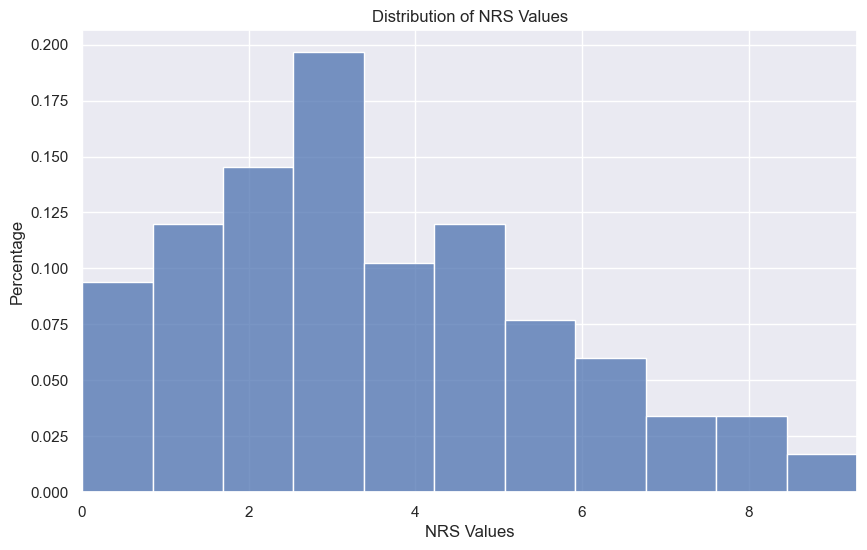

In [39]:
trials_avg=trials.groupby("id").mean()
num_bins = 11
# Create the histogram using seaborn
plt.figure(figsize=(10, 6))  # Adjust the size of the figure if needed
sns.histplot(trials_avg['NRS'], bins=num_bins, kde=False, stat='probability')
# Format the plot
plt.xlabel('NRS Values')
plt.ylabel('Percentage')
plt.title('Distribution of NRS Values')
plt.xlim(trials_avg['NRS'].min(), trials_avg['NRS'].max())
plt.savefig(RESULTS_DIR_EDA+"NRS.pdf", dpi=300)

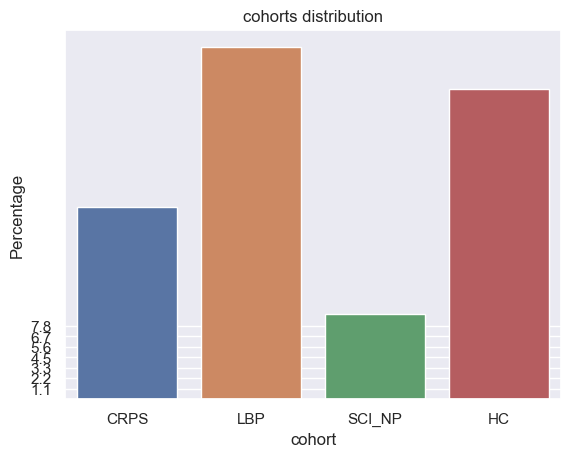

In [24]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cohort", data=trials)
yticks=np.array([250, 500, 750, 1000, 1250, 1500, 1750])
plt.yticks(yticks, np.round((yticks/trials.shape[0])*100, 1))
plt.title("cohorts distribution")
plt.ylabel("Percentage")
plt.savefig(RESULTS_DIR_EDA + "cohorts", dpi=300)
plt.show()

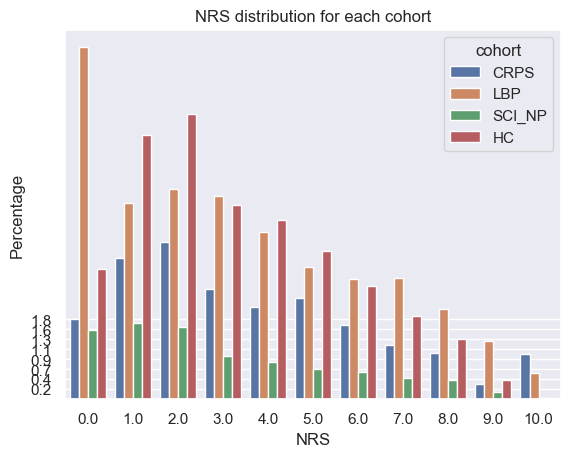

In [28]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="NRS", hue="cohort", data=trials)
yticks=np.array([50, 100, 150, 200, 250, 300, 350, 400])
plt.yticks(yticks, np.round((yticks/trials.shape[0])*100, 1))
plt.ylabel("Percentage")
plt.title("NRS distribution for each cohort")
plt.savefig(RESULTS_DIR_EDA+"NRS_cohorts.pdf", dpi=300)
plt.show()

In [26]:
NRS=[]
_cohorts=(trials.groupby("cohort"))["NRS"].describe()
_cohorts

,count,mean,std,min,25%,50%,75%,max
cohort,,,,,,,,
CRPS,4594.0,3.759251,2.738145,0.0,2.0,3.0,6.0,10.0
HC,7398.0,3.247634,2.296830,0.0,1.0,3.0,5.0,10.0
LBP,8402.0,3.358248,2.816612,0.0,1.0,3.0,5.0,10.0
SCI_NP,2034.0,2.949853,2.507332,0.0,1.0,2.0,5.0,10.0


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CRPS v.s. LBP: Mann-Whitney-Wilcoxon test two-sided, P_val=7.936e-19 U_stat=2.110e+07
LBP v.s. SCI_NP: Mann-Whitney-Wilcoxon test two-sided, P_val=1.392e-06 U_stat=9.128e+06
SCI_NP v.s. HC: Mann-Whitney-Wilcoxon test two-sided, P_val=8.848e-12 U_stat=6.789e+06
CRPS v.s. SCI_NP: Mann-Whitney-Wilcoxon test two-sided, P_val=2.331e-30 U_stat=5.488e+06
LBP v.s. HC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.639e-01 U_stat=3.068e+07
CRPS v.s. HC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.791e-16 U_stat=1.850e+07


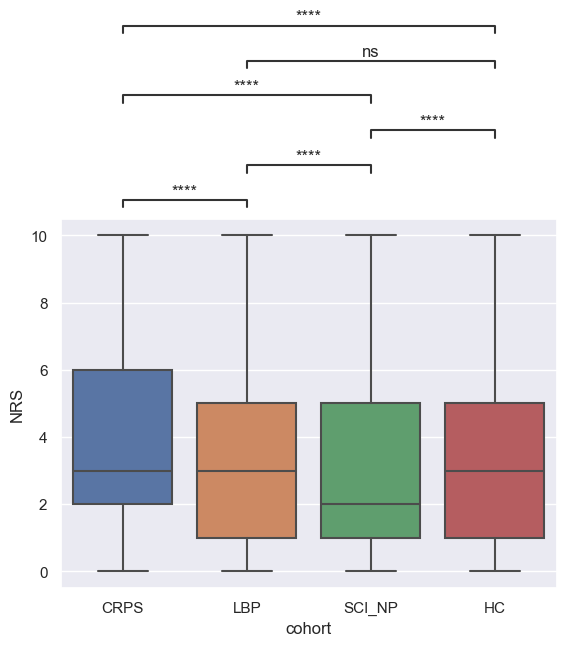

In [27]:
ax = sns.boxplot(x="cohort", y="NRS", data=trials)
order=["CRPS", "LBP", "SCI_NP", "HC"]
test_results = statannot.add_stat_annotation(ax, data=trials, x="cohort", y="NRS", order=order,
                                   box_pairs=[("CRPS", "HC"), ("CRPS", "LBP"), ("CRPS", "SCI_NP"), ("LBP", "SCI_NP"), ("HC", "LBP"), ("HC", "SCI_NP")],
                                   test='Mann-Whitney',  text_format='star', comparisons_correction=None,
                                   loc='outside', verbose=2)
test_results
plt.savefig(RESULTS_DIR_EDA + "NRS_cohorts_boxplots", dpi=300)
plt.show()

## 4) NRS and Area

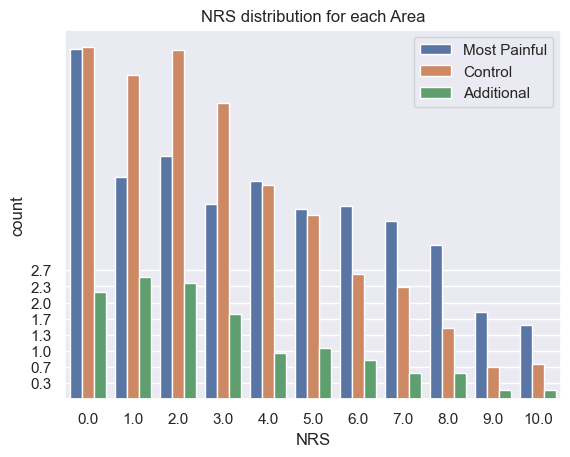

In [55]:
sns.set_theme(style="darkgrid")
trials_pat=trials[trials.cohort!="HC"]
ax = sns.countplot(x="NRS", hue="AreaP", data=trials_pat)
yticks=np.array([50, 100, 150, 200, 250, 300, 350, 400])
plt.yticks(yticks, np.round((yticks/trials_pat.shape[0])*100, 1))
plt.legend(["Most Painful", "Control", "Additional"])
plt.title("NRS distribution for each Area")
plt.savefig(RESULTS_DIR_EDA+"NRS_Areas", dpi=300)
plt.show()

In [56]:
NRS=[]
_cohorts=(trials_pat.groupby("AreaP"))["NRS"].describe()
_cohorts

,count,mean,std,min,25%,50%,75%,max
AreaP,,,,,,,,
1,6542.0,3.933048,2.975327,0.0,1.0,4.0,6.0,10.0
2,6502.0,3.071055,2.523697,0.0,1.0,3.0,5.0,10.0
3,1986.0,2.914401,2.513785,0.0,1.0,2.0,5.0,10.0


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided, P_val=7.811e-56 U_stat=2.463e+07
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided, P_val=4.978e-03 U_stat=6.722e+06
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided, P_val=4.923e-38 U_stat=7.727e+06


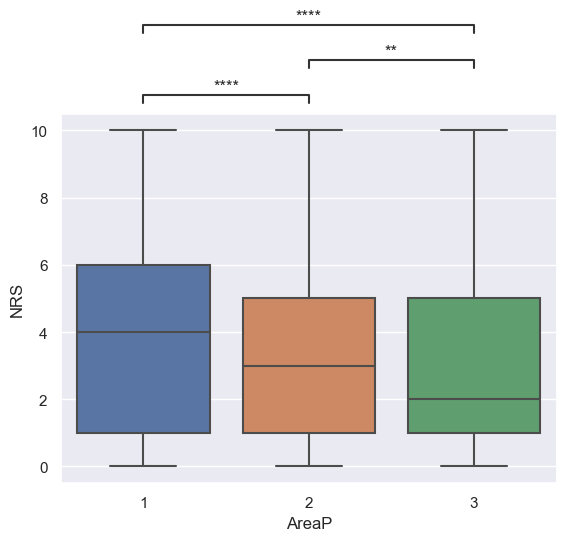

In [57]:
ax = sns.boxplot(x="AreaP", y="NRS", data=trials_pat)
test_results = statannot.add_stat_annotation(ax, data=trials_pat, x="AreaP", y="NRS", 
                                   box_pairs=[(1, 2), (1, 3), (2, 3)],
                                   test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                   loc='outside', verbose=2)
test_results
plt.savefig(RESULTS_DIR_EDA+"NRS_Areas_boxplot", dpi=300)
plt.show()